In [1]:
import numpy as np
import pandas as pd

#Generar los espacios
h=0.1
X_cord,Y_cord=np.mgrid[-3:3:h,0:5:h]
xy = np.vstack((X_cord.flatten(), Y_cord.flatten())).T


In [2]:
def g_func(point):
    return -1*((point[0])**2)*np.sin(3*point[0])-1*point[1]**2+10

In [3]:
#generar el Gamma

In [4]:
def gamma_sq(x0,pit):
    Gamma=np.array(list())
    for point in pit:
        if 5*abs(point[0]-x0[0]) +x0[1] <=point[1]:
            Gamma=np.append(Gamma,point)
    return np.reshape(Gamma,(-1,2))

In [5]:
#generar los espacios X, Y

In [6]:
def get_XY(pit,g_func):
    X=np.array(list())
    Y=np.array(list())
    for point in pit:
        if g_func(point)>0:
            X=np.append(X,point)
        if g_func(point)<0:
            Y=np.append(Y,point)
    return np.reshape(X,(-1,2)),np.reshape(Y,(-1,2))

In [7]:
pit=xy

In [8]:
X_no_alpha,Y_no_w=get_XY(pit,lambda point: g_func(point))

In [9]:
def func_c(X,Y,Gamma):
    c=np.full((X.shape[0],Y.shape[0]),10**9)
    i=0
    for x in X:
        j=0
        gamma=Gamma(x).tolist()
        for y in Y:
            y_list=y.tolist()
            if y_list in gamma:
                c[i,j]=0
            j+=1
        i+=1
        if i % 100==0:
            print("Has been "+str(i)+" iterations")
    return c
        

In [10]:
c=func_c(X_no_alpha,Y_no_w,lambda point: gamma_sq(point,pit))

Has been 100 iterations
Has been 200 iterations
Has been 300 iterations
Has been 400 iterations
Has been 500 iterations
Has been 600 iterations
Has been 700 iterations
Has been 800 iterations
Has been 900 iterations
Has been 1000 iterations
Has been 1100 iterations
Has been 1200 iterations
Has been 1300 iterations
Has been 1400 iterations
Has been 1500 iterations
Has been 1600 iterations
Has been 1700 iterations
Has been 1800 iterations
Has been 1900 iterations


In [11]:
c.shape

(1910, 1090)

In [12]:
c_new=np.append(c,np.ones((X_no_alpha.shape[0],1)),axis=1)

c_new=np.append(c_new,np.zeros((Y_no_w.shape[0]+1,1)).T,axis=0)

In [13]:
mu=np.array(list())
nu=np.array(list())
for x in X_no_alpha:
    mu=np.append(mu,g_func(x)*0.1)
for y in Y_no_w:
    nu=np.append(nu,abs(g_func(y))*0.1)


In [14]:
alpha=sum(nu)
w=sum(mu)
mu=np.append(mu,alpha)
nu=np.append(nu,w)

In [15]:
mu=mu*(h**2)
nu=nu*(h**2)

There is no need to normalize the measures

In [16]:
X=np.append(X_no_alpha,["alpha","alpha"])
X=np.reshape(X,(-1,2))

In [17]:
Y=np.append(Y_no_w,["w","w"])
Y=np.reshape(Y,(-1,2))

### Run the pit_1.py file to get the p_opt and q_opt files

In [19]:
import numpy as np
import pandas as pd

In [20]:
p_opt=np.array(pd.read_csv("p_opt_pit2.csv",sep=",",header=None))

In [21]:
q_opt=np.array(pd.read_csv("q_opt_pit2.csv",sep=",",header=None))

In [22]:
mu=np.reshape(mu,(-1,1))

In [23]:
nu=np.reshape(nu,(-1,1))

In [24]:
sum(p_opt*mu)-sum(q_opt*nu)

array([5.94996472])

In [25]:
pit_plus=list()
pit_minus=list()
for i in range(X.shape[0]-1):
    if p_opt[i]:
        pit_plus.append(X[i])
for j in range(Y.shape[0]-1):
    if q_opt[j]:
        pit_minus.append(Y[j])

In [26]:
pit_plus=np.array(pit_plus)
pit_minus=np.array(pit_minus)

---
### Visualisate the pit
---

In [27]:
pit_plus.shape

(1683, 2)

In [28]:
pit_minus.shape

(938, 2)

In [29]:
pit=np.concatenate((pit_plus[0:-1],pit_minus[0:-1]),axis=0)

In [30]:
pit=np.array(list(map(lambda x : float(x),np.reshape(pit,(-1,1)))))

In [31]:
pit=np.reshape(pit,(-1,2))

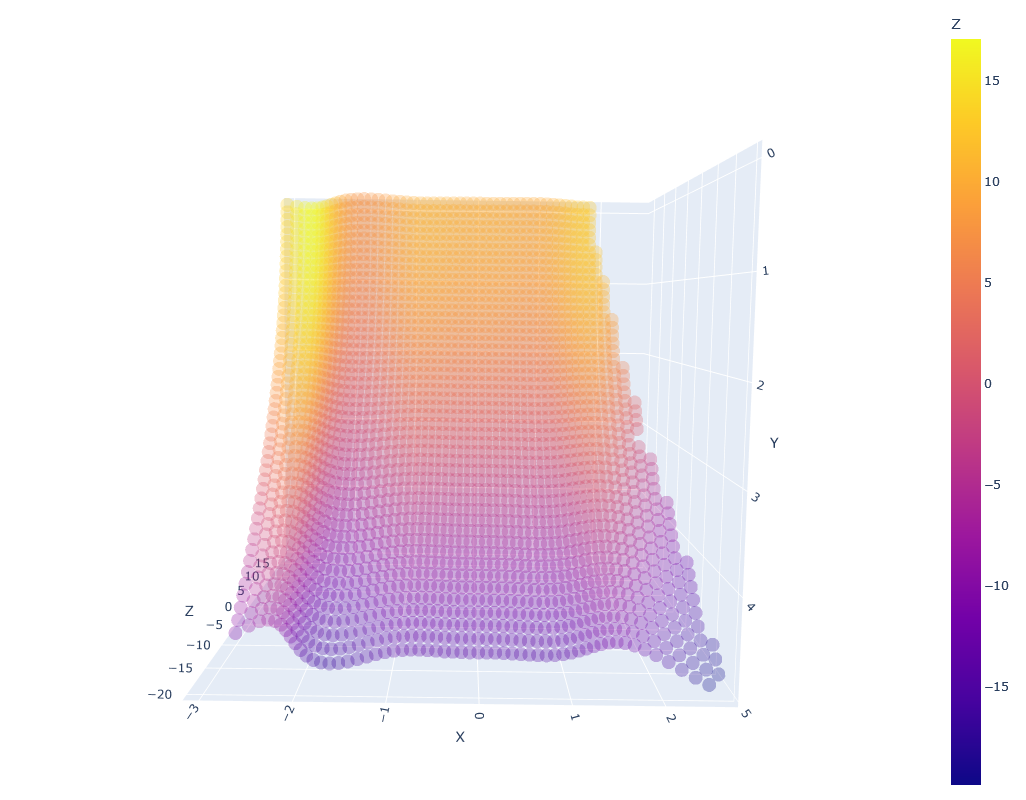

In [34]:
g_values=np.array(list())
for point in pit:
    g_values=np.append(g_values,g_func(point))


df = pd.DataFrame(dict(
    X=pit[:,0], 
    Y=pit[:,1], 
    Z=g_values
))

import plotly.express as px

fig = px.scatter_3d(df, x='X', y='Y', z='Z',opacity=0.3,color='Z')
fig.update_layout(margin=dict(l=5, r=5, t=5, b=5),width=800, height=800)
fig.show()